In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('all_merge.csv')

In [3]:
df.head()

,Brand,Review,Detail,Rating
0,Blue_Buffalo,My dogs love it - but currently out of stock,Yes and yes! Both my border collie and Chihuah...,4.7
1,Blue_Buffalo,Inconsistent quality,My dog has been eating this dog food for 10 ye...,5.0
2,Blue_Buffalo,I've not had problems with this food,I've had no problems with this brand of BB dog...,3.0
3,Blue_Buffalo,Fast and convenient,"Order came fast. My pups love this brand, much...",5.0
4,Blue_Buffalo,My dog loves it!,My dogs have been eating this a few years now ...,4.0


In [4]:
df.shape

(1978, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brand   1978 non-null   object 
 1   Review  1978 non-null   object 
 2   Detail  1978 non-null   object 
 3   Rating  1978 non-null   float64
dtypes: float64(1), object(3)
memory usage: 61.9+ KB


In [6]:
df.Review.head()

0    My dogs love it - but currently out of stock
1                            Inconsistent quality
2            I've not had problems with this food
3                             Fast and convenient
4                                My dog loves it!
Name: Review, dtype: object

# Text Preprocessing

In [7]:
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word
# Lower casing and removing punctuations

df['Detail'] = df['Detail'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Review'] = df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [8]:
l = ['[^\w\s]', 'meow', 'mix', 'dog', 'food', 'cat',
     'blue', 'purina', 'pro', 'one', 'meow', 'buffalo']

In [9]:
df['Detail'] = df.Detail.str.replace('|'.join(l), '', regex=True).str.strip()

In [10]:
df

,Brand,Review,Detail,Rating
0,Blue_Buffalo,my dogs love it - but currently out of stock,yes and yes both my border collie and chihuahu...,4.7
1,Blue_Buffalo,inconsistent quality,my has been eating this for 10 years now i ...,5.0
2,Blue_Buffalo,i've not had problems with this food,ive had no blems with this brand of bb i jus...,3.0
3,Blue_Buffalo,fast and convenient,order came fast my pups love this brand much b...,5.0
4,Blue_Buffalo,my dog loves it!,my s have been eating this a few years now and...,4.0
...,...,...,...,...
1973,Purina_One,shiny coat happy cat,my three indoor s love this dry is a older ...,5.0
1974,Purina_One,cat food,its been awhile since weve branched out toward...,5.0
1975,Purina_One,"new food, new friends!",purr purr purr chomp chomp crunch crunch purr ...,4.0
1976,Purina_One,they seems super exciting,the salmon flavor the turkey flavor are the...,3.0


# Removal of Stop Words

In [11]:
stop = stopwords.words('english')
df['Detail'] = df['Detail'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.Detail.head()

0    yes yes border collie chihuahua love stock swi...
1    eating 10 years noticed order amazon bags cont...
2    ive blems brand bb started shipments 2 months ...
3          order came fast pups love brand much better
4    eating years love pancreatitis prescription aw...
Name: Detail, dtype: object

In [12]:
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.Review.head()

0    dogs love - currently stock
1           inconsistent quality
2             i've problems food
3                fast convenient
4                  dog loves it!
Name: Review, dtype: object

# Spelling Correction

## Lemmatization

In [13]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
df['Detail'] = df['Detail'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Detail.head()

0    yes yes border collie chihuahua love stock swi...
1    eating 10 year noticed order amazon bag conten...
2    ive blems brand bb started shipment 2 month ag...
3           order came fast pup love brand much better
4    eating year love pancreatitis prescription awh...
Name: Detail, dtype: object

In [15]:
df['Review'] = df['Review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.Review.head()

0    dog love - currently stock
1          inconsistent quality
2             i've problem food
3               fast convenient
4                  dog love it!
Name: Review, dtype: object

## Look at the Summary Text using wordcloud

In [16]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [17]:
df.columns

Index(['Brand', 'Review', 'Detail', 'Rating'], dtype='object')

In [18]:
df.Rating.value_counts()

5.0    1318
3.0     237
4.0     227
4.7     113
4.8      36
2.0      25
1.0      22
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

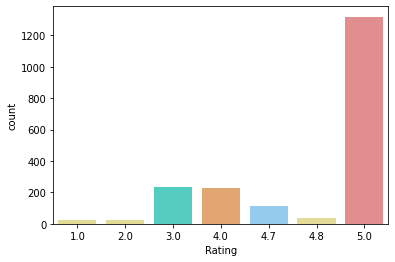

In [19]:
import seaborn as sns
sns.countplot(data = df, x = 'Rating', palette=['khaki','khaki','turquoise','sandybrown','lightskyblue','khaki','lightcoral'])

## Negative vs Positive Detection

In [20]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')

In [21]:
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [22]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['Detail']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.640,0.360,0.9360
1,0.203,0.669,0.128,-0.5719
2,0.032,0.821,0.147,0.7783
3,0.000,0.458,0.542,0.7964
4,0.000,0.704,0.296,0.6369


In [23]:
# Merging the sentiments back to reviews dataframe
df_D = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_D.head(3)

,Brand,Review,Detail,Rating,neg,neu,pos,compound
0,Blue_Buffalo,dog love - currently stock,yes yes border collie chihuahua love stock swi...,4.7,0.000,0.640,0.360,0.9360
1,Blue_Buffalo,inconsistent quality,eating 10 year noticed order amazon bag conten...,5.0,0.203,0.669,0.128,-0.5719
2,Blue_Buffalo,i've problem food,ive blems brand bb started shipment 2 month ag...,3.0,0.032,0.821,0.147,0.7783


In [24]:
# Convert scores into positive and negetive sentiments using some threshold
df_D['Sentiment'] = np.where(df_D['compound'] >= 0 , 'Positive','Negative')
df_D.head(5)

,Brand,Review,Detail,Rating,neg,neu,pos,compound,Sentiment
0,Blue_Buffalo,dog love - currently stock,yes yes border collie chihuahua love stock swi...,4.7,0.000,0.640,0.360,0.9360,Positive
1,Blue_Buffalo,inconsistent quality,eating 10 year noticed order amazon bag conten...,5.0,0.203,0.669,0.128,-0.5719,Negative
2,Blue_Buffalo,i've problem food,ive blems brand bb started shipment 2 month ag...,3.0,0.032,0.821,0.147,0.7783,Positive
3,Blue_Buffalo,fast convenient,order came fast pup love brand much better,5.0,0.000,0.458,0.542,0.7964,Positive
4,Blue_Buffalo,dog love it!,eating year love pancreatitis prescription awh...,4.0,0.000,0.704,0.296,0.6369,Positive


In [25]:
score_1 = df_D[df_D['Sentiment'] == "Positive"]
score_0 = df_D[df_D['Rating'] == "Negative"]

In [26]:
reviews_sample = pd.concat([score_0,score_1],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

## Seperate Brand

In [27]:
cat_totals = df_D.groupby("Brand")["compound"].sum().sort_values()
cat_totals

Brand
Meow_Mix        217.8079
Purina_One      240.8332
Blue_Buffalo    263.2469
Purina_Pro      269.1389
Name: compound, dtype: float64

<AxesSubplot:ylabel='Brand'>

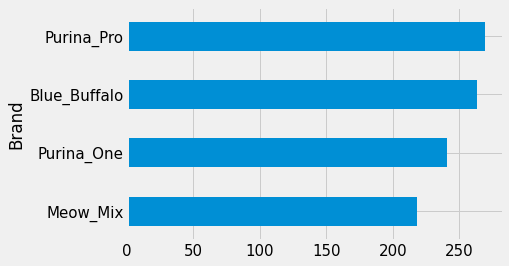

In [28]:
cat_totals.plot(kind="barh", fontsize=15)

In [29]:
df_D['Brand'].value_counts()

Blue_Buffalo    501
Purina_Pro      500
Meow_Mix        491
Purina_One      486
Name: Brand, dtype: int64

In [30]:
df_Blue = df_D.iloc[:501]
df_Purina = df_D.iloc[502:1001]
df_MM = df_D.iloc[1002:1492]
df_PO = df_D.iloc[1493:]
df_D = pd.concat([df_Blue, df_Purina], axis=0)
df_C = pd.concat([df_MM, df_PO], axis=0)

In [31]:
df_MM

,Brand,Review,Detail,Rating,neg,neu,pos,compound,Sentiment
1002,Meow_Mix,cat eat,may best healthiest although great brand healt...,5.0,0.080,0.535,0.385,0.9714,Positive
1003,Meow_Mix,colony cat get fed,friend feed colony 25 neighborhood across town...,3.0,0.000,0.501,0.499,0.9509,Positive
1004,Meow_Mix,kitty crack,dont know every ive owned prefers anything els...,5.0,0.000,0.752,0.248,0.7650,Positive
1005,Meow_Mix,cat love it!,since dont eat cant tell flavor tell love pref...,5.0,0.000,0.667,0.333,0.7579,Positive
1006,Meow_Mix,good buy!,somehow adopted pair using crawl space shelter...,5.0,0.000,0.446,0.554,0.9313,Positive
...,...,...,...,...,...,...,...,...,...
1487,Meow_Mix,watch,know great quality love feed 2 ferals 1 cup da...,5.0,0.083,0.494,0.422,0.9750,Positive
1488,Meow_Mix,cat love food. thing eat.,im going lie never tasted knowi know give 5 st...,4.0,0.091,0.836,0.073,-0.1280,Negative
1489,Meow_Mix,taste great grape nut banana milk,doesnt healthiest ingredient compared finicky ...,5.0,0.060,0.605,0.335,0.8271,Positive
1490,Meow_Mix,great price!,good give kidney sts doctor said high carbs,5.0,0.000,0.707,0.293,0.4404,Positive


# DOG

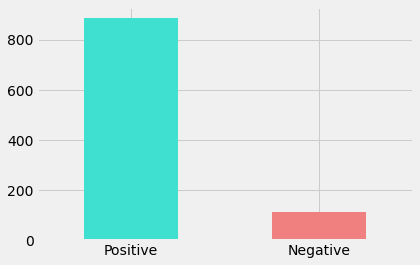

In [32]:
result_D = df_D['Sentiment'].value_counts()
result_D.plot(kind ='bar', rot=0, color = ['turquoise', 'lightcoral']);

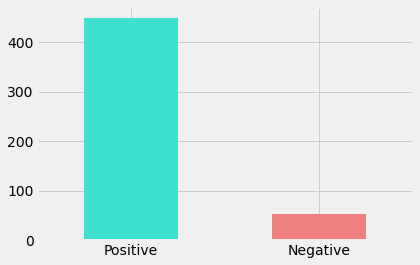

In [33]:
result_Blue = df_Blue['Sentiment'].value_counts()
result_Blue.plot(kind ='bar', rot=0, color = ['turquoise', 'lightcoral']);

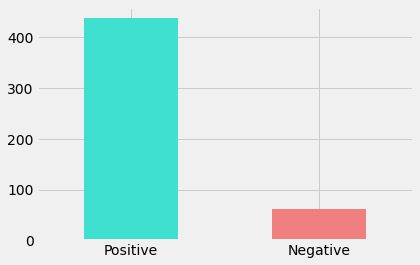

In [34]:
result_Purina = df_Purina['Sentiment'].value_counts()
result_Purina.plot(kind ='bar', rot=0, color = ['turquoise', 'lightcoral']);

## Blue Buffalo Wordcloud

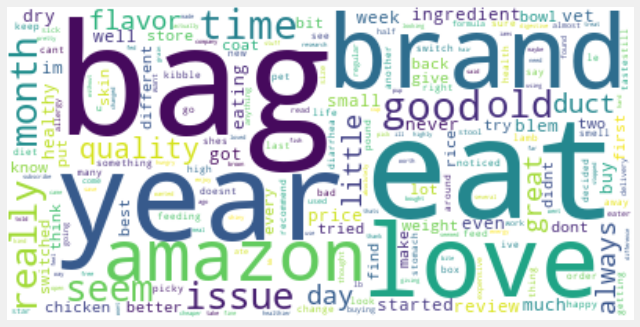

In [35]:
# Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str_blue = df_Blue.Detail.str.cat()
wordcloud = WordCloud(background_color='white', collocations=False).generate(reviews_str_blue)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [37]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_blue = df_Blue[df_Blue['compound'] <= 0]
positive_blue = df_Blue[df_Blue['compound'] > 0 ]
# Transform to single string
negative_blue_str = negative_blue.Detail.str.cat()
positive_blue_str = positive_blue.Detail.str.cat()

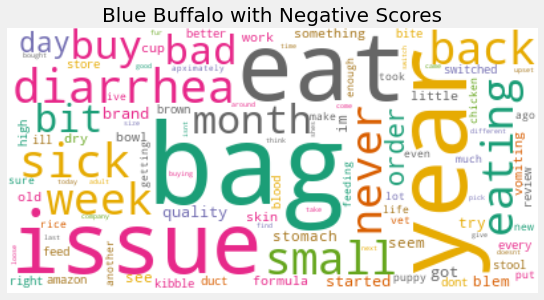

In [67]:
wordcloud_negativeB = WordCloud(background_color='white', collocations=False, colormap="Dark2", max_words=100).generate(negative_blue_str)
wordcloud_positiveB = WordCloud(background_color='white', max_words=100).generate(positive_blue_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negativeB,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Blue Buffalo with Negative Scores',fontsize=20)

plt.savefig("DOGB_Negative.png", format="png")

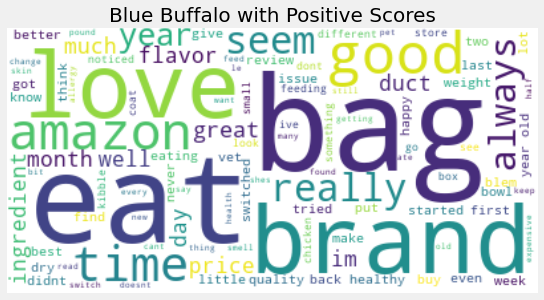

In [73]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positiveB,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Blue Buffalo with Positive Scores',fontsize=20)

plt.savefig("DOGB_Positive.png", format="png")
plt.show()

## Purina Pro Wordcloud

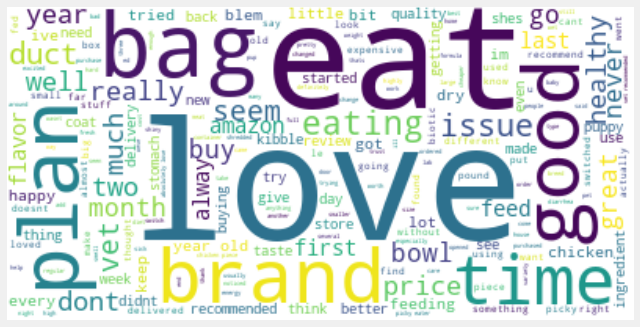

In [40]:
# Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str_P = df_Purina.Detail.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str_P)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_Purina = df_Purina[df_Purina['compound'] <= 0]
positive_Purina = df_Purina[df_Purina['compound'] > 0 ]
# Transform to single string
negative_purina_str = negative_Purina.Detail.str.cat()
positive_purina_str = positive_Purina.Detail.str.cat()

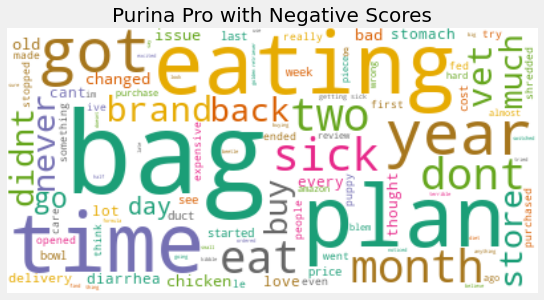

In [69]:
wordcloud_negativeP = WordCloud(background_color='white', colormap="Dark2", max_words=100).generate(negative_purina_str)
wordcloud_positiveP = WordCloud(background_color='white', max_words=100).generate(positive_purina_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negativeP,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Purina Pro with Negative Scores',fontsize=20)

plt.savefig("DOGPP_Negative.png", format="png")

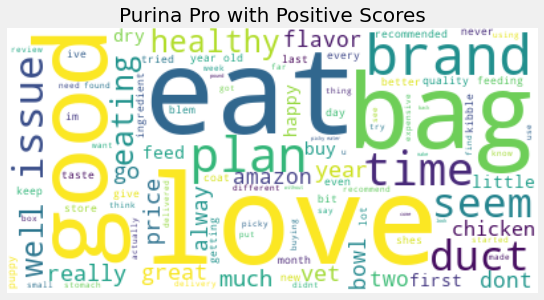

In [70]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positiveP,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Purina Pro with Positive Scores',fontsize=20)

plt.savefig("DOGPP_Positive.png", format="png")
plt.show()

# CAT

In [44]:
df_C

,Brand,Review,Detail,Rating,neg,neu,pos,compound,Sentiment
1002,Meow_Mix,cat eat,may best healthiest although great brand healt...,5.0,0.080,0.535,0.385,0.9714,Positive
1003,Meow_Mix,colony cat get fed,friend feed colony 25 neighborhood across town...,3.0,0.000,0.501,0.499,0.9509,Positive
1004,Meow_Mix,kitty crack,dont know every ive owned prefers anything els...,5.0,0.000,0.752,0.248,0.7650,Positive
1005,Meow_Mix,cat love it!,since dont eat cant tell flavor tell love pref...,5.0,0.000,0.667,0.333,0.7579,Positive
1006,Meow_Mix,good buy!,somehow adopted pair using crawl space shelter...,5.0,0.000,0.446,0.554,0.9313,Positive
...,...,...,...,...,...,...,...,...,...
1973,Purina_One,shiny coat happy cat,three indoor love dry older female 4yearold ma...,5.0,0.000,0.636,0.364,0.7430,Positive
1974,Purina_One,cat food,awhile since weve branched towards higher end ...,5.0,0.048,0.837,0.114,0.4552,Positive
1975,Purina_One,"new food, new friends!",purr purr purr chomp chomp crunch crunch purr ...,4.0,0.000,0.858,0.142,0.4549,Positive
1976,Purina_One,seems super exciting,salmon flavor turkey flavor eat might eat meal...,3.0,0.163,0.741,0.096,-0.2263,Negative


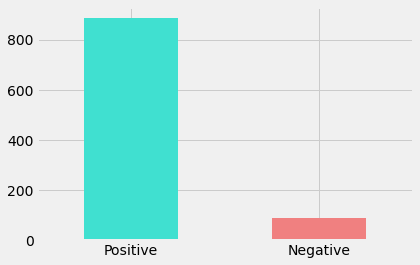

In [45]:
result_C = df_C['Sentiment'].value_counts()
result_C.plot(kind ='bar', rot=0, color = ['turquoise', 'lightcoral']);

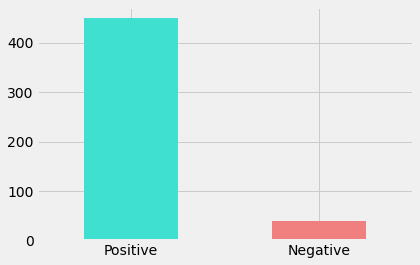

In [46]:
result_MM = df_MM['Sentiment'].value_counts()
result_MM.plot(kind ='bar', rot=0, color = ['turquoise', 'lightcoral']);

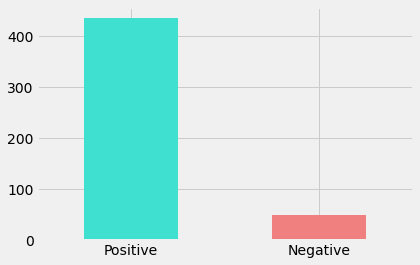

In [47]:
result_PO = df_PO['Sentiment'].value_counts()
result_PO.plot(kind ='bar', rot=0, color = ['turquoise', 'lightcoral']);

## Meow Mix Wordcloud

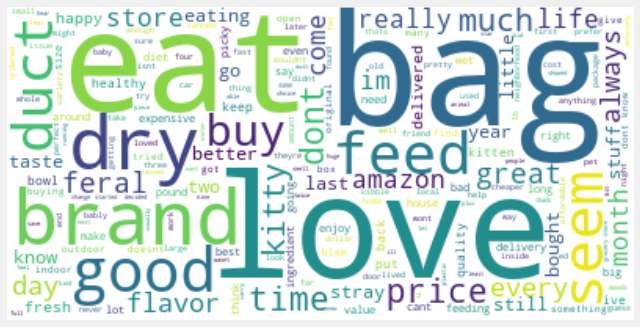

In [48]:
# Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str_MM = df_MM.Detail.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str_MM)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [49]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_MM = df_MM[df_MM['compound'] <= 0]
positive_MM = df_MM[df_MM['compound'] > 0 ]
# Transform to single string
negative_MM_str = negative_MM.Detail.str.cat()
positive_MM_str = positive_MM.Detail.str.cat()

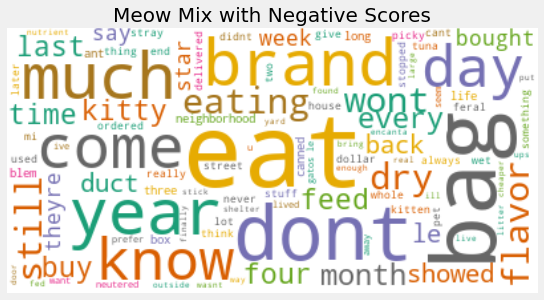

In [65]:
wordcloud_negativeMM = WordCloud(background_color='white', colormap="Dark2", max_words=100).generate(negative_MM_str)
wordcloud_positiveMM = WordCloud(background_color='white', max_words=100).generate(positive_MM_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negativeMM,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Meow Mix with Negative Scores',fontsize=20)

plt.savefig("CATMM_Negative.png", format="png")

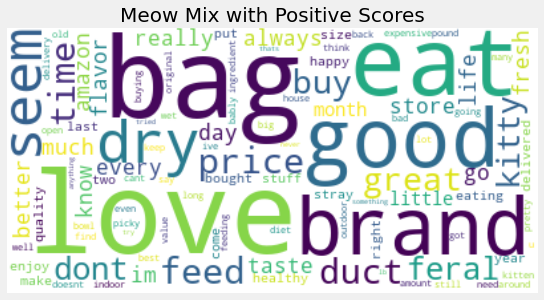

In [66]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positiveMM,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Meow Mix with Positive Scores',fontsize=20)

plt.savefig("CATMM_Positive.png", format="png")
plt.show()

## Purina One Wordcloud

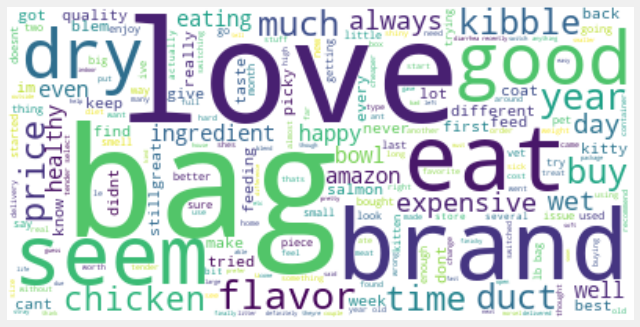

In [52]:
# Wordcloud function's input needs to be a single string of text.
# concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str_PO = df_PO.Detail.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str_PO)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [53]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_PO = df_PO[df_PO['compound'] <= 0]
positive_PO = df_PO[df_PO['compound'] > 0 ]
# Transform to single string
negative_PO_str = negative_PO.Detail.str.cat()
positive_PO_str = positive_PO.Detail.str.cat()

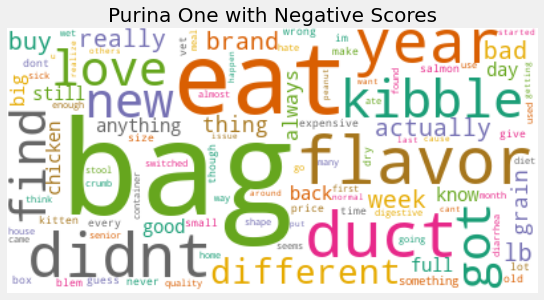

In [71]:
wordcloud_negativePO = WordCloud(background_color='white', colormap="Dark2", max_words=100).generate(negative_PO_str)
wordcloud_positivePO = WordCloud(background_color='white', max_words=100).generate(positive_PO_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negativePO,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Purina One with Negative Scores',fontsize=20)

plt.savefig("CATPO_Negative.png", format="png")

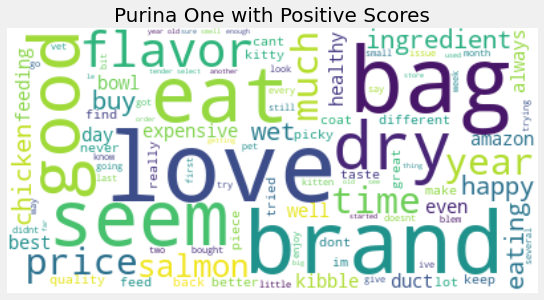

In [72]:
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positivePO,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Purina One with Positive Scores',fontsize=20)

plt.savefig("CATPO_Positive.png", format="png")
plt.show()